In [1]:
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
import staintools
import os

In [2]:
target = staintools.read_image("./dataloader/ref2.png")
to_transform = staintools.read_image('/DataMount/dm553/project/renamed_images/700803_ROI Deep Image 6.png')
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)
skio.imsave('./700803_ROI Deep Image 6_norm.png', transformed)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
img_dir = '/DataMount/xl260/Casey_aapm2024/ROI'
save_dir = '/DataMount/xl260/Casey_aapm2024/ROI_norm'
imgs = os.listdir(img_dir)

In [7]:
for img in imgs:
    target = staintools.read_image("./dataloader/ref2.png")
    to_transform = staintools.read_image('/DataMount/xl260/Casey_aapm2024/ROI/'+img)
    normalizer = staintools.StainNormalizer(method='macenko')
    normalizer.fit(target)
    transformed = normalizer.transform(to_transform)
    skio.imsave(save_dir+'/'+img, transformed)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

In [ ]:
# Stain normalize
normalizer = staintools.StainNormalizer(method='macenko')
#normalizer = ReinhardColorNormalizer()
normalizer.fit(target)
transformed = normalizer.transform(to_transform)

In [16]:
imgs = os.listdir('/DataMount/xl260/Megan_scanner/WSI')

In [14]:
import os
masks = os.listdir('/DataMount/xl260/Megan_scanner/Output/mask')
masks

['1015619.png',
 '1015620.png',
 '1015621.png',
 '1015622.png',
 '1015623.png',
 '29ead210-6794-9983-d634-e85e374390fa_153648.png',
 '452a009b-b3d6-5d43-53d9-40bd1ca214c4_153250.png',
 '9d7cf7d5-8230-dfc0-3851-b53821231949_153409.png',
 '9e065b50-fbc3-02be-c141-73e2475bda11_153811.png',
 'a2d0ce4f-9dad-d581-9a20-cc51d43924aa_153530.png']

In [15]:
import openslide

In [6]:
slide = openslide.OpenSlide('/DataMount/xl260/Megan_scanner/WSI/'+'1015619.svs')
associated_images = slide.associated_images


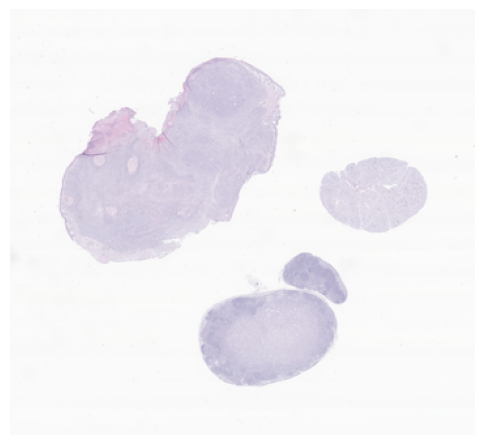

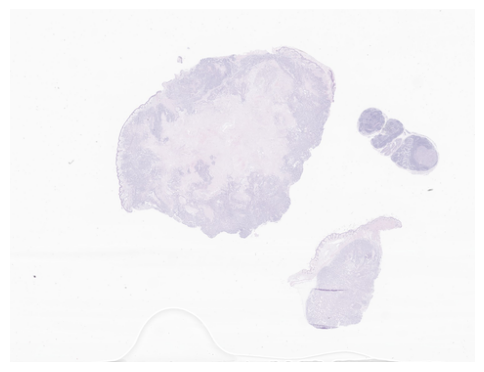

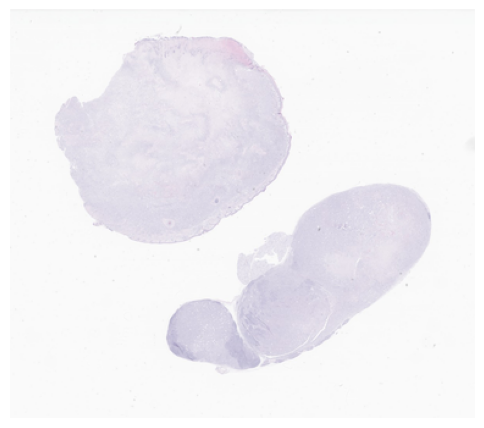

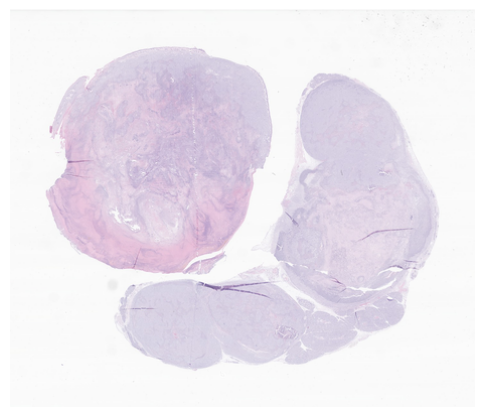

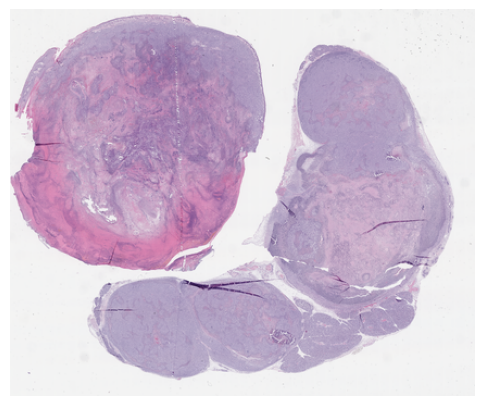

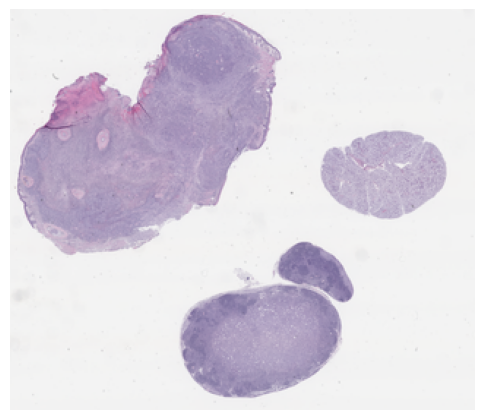

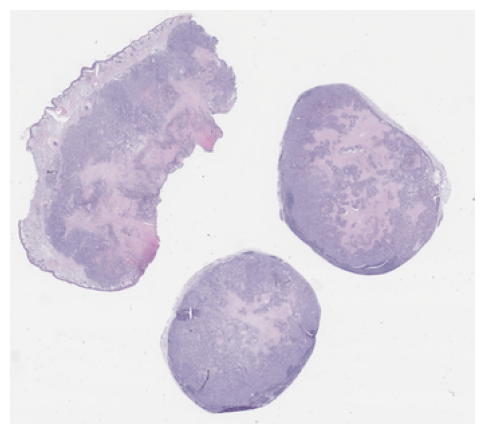

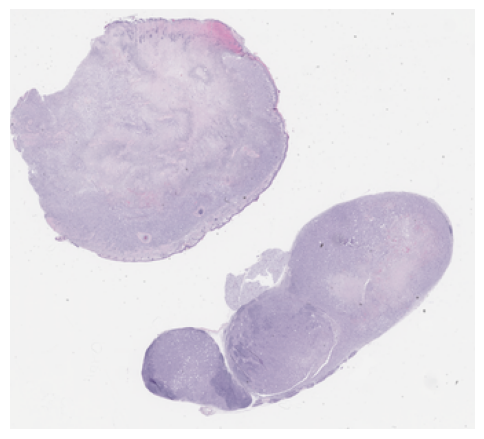

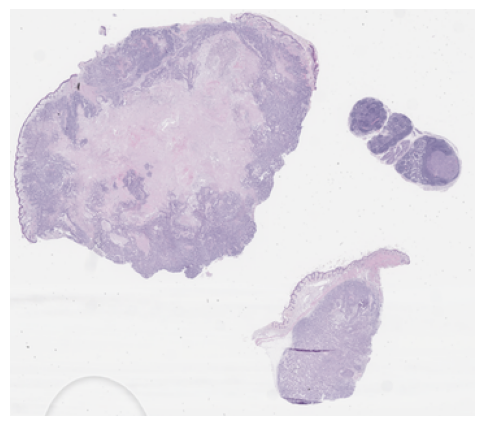

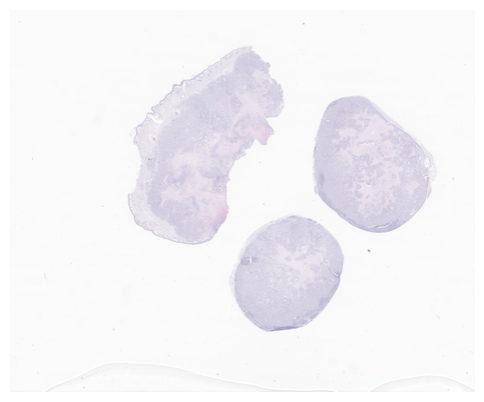

In [14]:
# read thumbnail image using openslide
for img in imgs:
    wsi = openslide.OpenSlide('/DataMount/xl260/Megan_scanner/WSI/'+img)
    thumbnail = wsi.get_thumbnail((wsi.dimensions[0]//200, wsi.dimensions[1]//200))
    plt.figure(figsize=(6, 6))
    plt.imshow(thumbnail)
    plt.axis('off')
    plt.show()


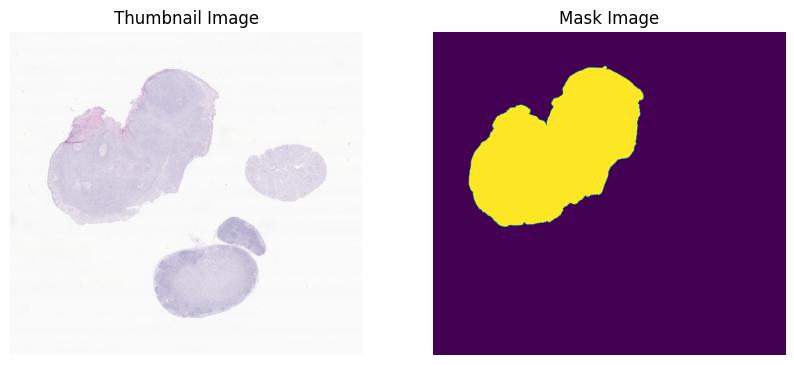

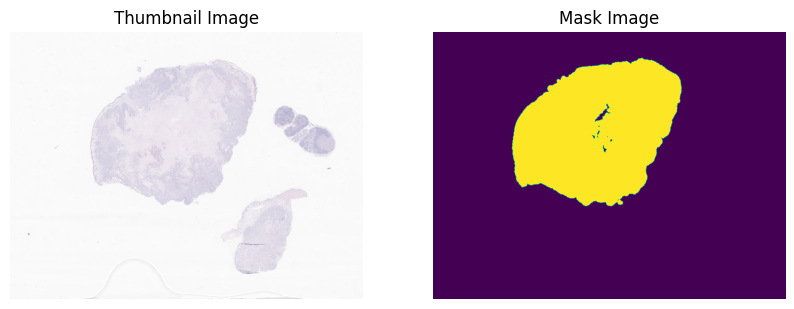

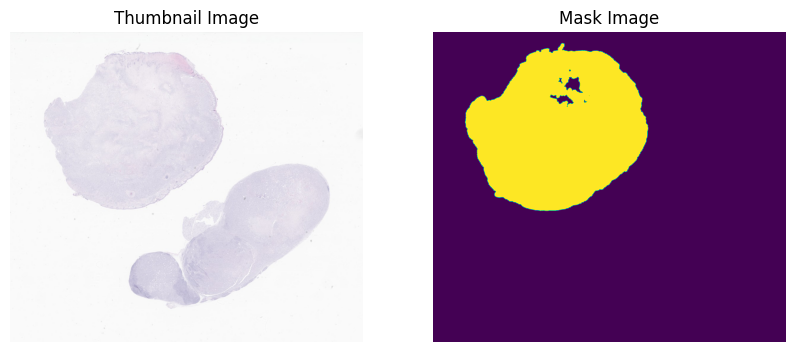

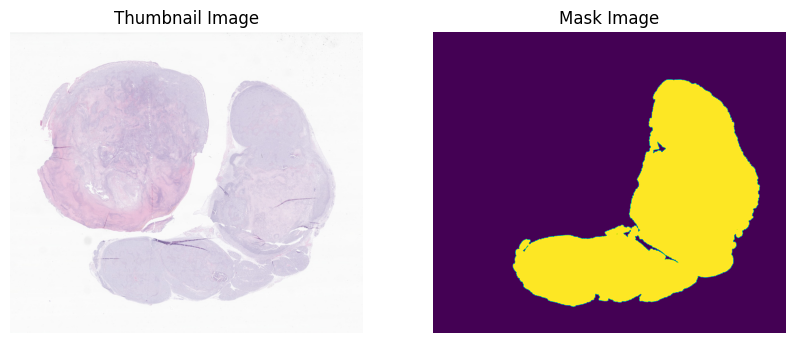

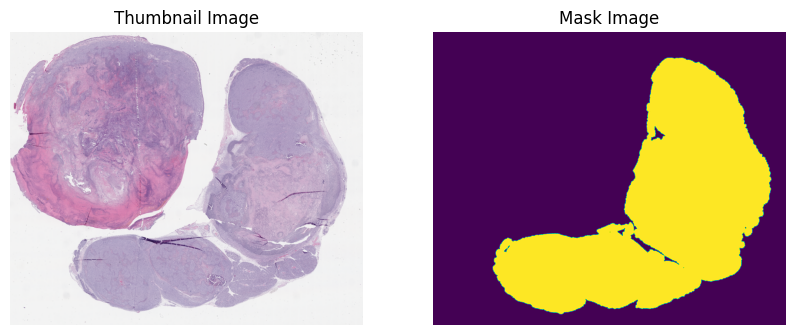

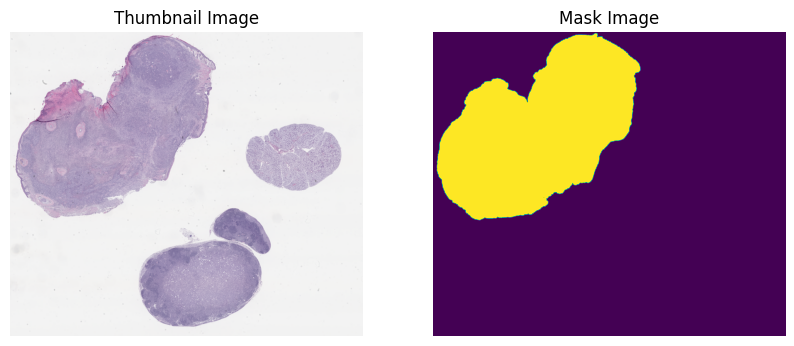

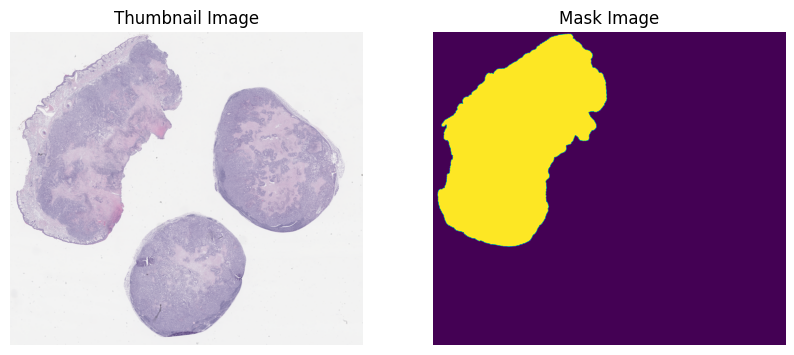

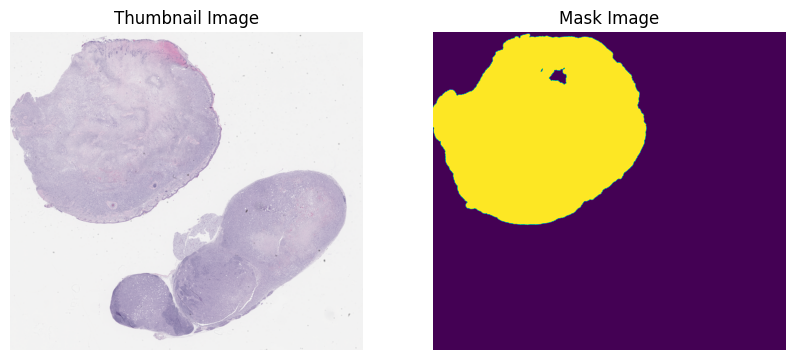

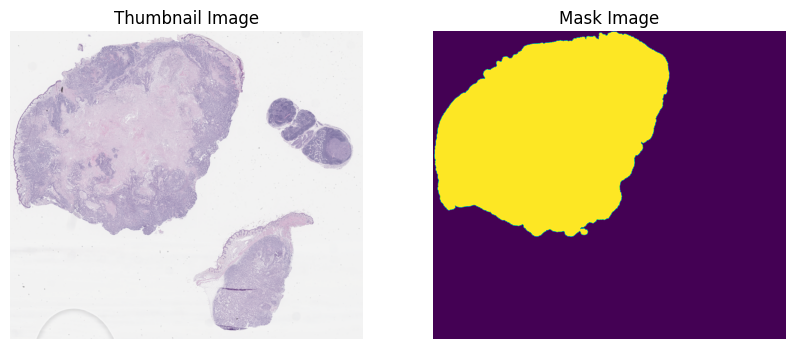

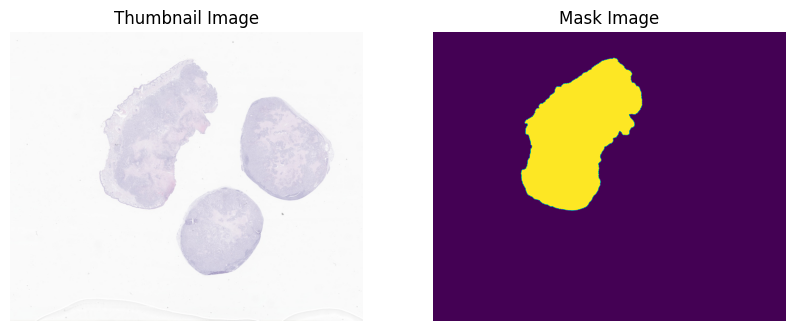

In [18]:
# read thumbnail image using openslide
for img in imgs:
    casei = img.split('.')[0]
    wsi = openslide.OpenSlide('/DataMount/xl260/Megan_scanner/WSI/'+ casei + '.svs')
    try:
        mask = skio.imread('/DataMount/xl260/Megan_scanner/Output/mask/'+ casei + '.png')
    except:
        continue

    # get the thumbnail image
    thumbnail = wsi.get_thumbnail((wsi.dimensions[0]//100, wsi.dimensions[1]//100))
    # print the thumbnail image and mask image side by side
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(thumbnail)
    plt.axis('off')
    plt.title('Thumbnail Image')
    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.axis('off')
    plt.title('Mask Image')
    plt.show()


In [59]:
# get mask image from thumbnail
from skimage import morphology
from skimage.measure import label, regionprops
import cv2

# simple method to extract tissue regions using intensity thresholding and morphological operations
def simple_get_mask(thumbnail):
    wsi_thumb_rgb = thumbnail
    gray = cv2.cvtColor(wsi_thumb_rgb, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    mask = morphology.remove_small_objects(
        mask == 0, min_size=16 * 16, connectivity=2
    )
    mask = morphology.remove_small_holes(mask, area_threshold=128 * 128)
    #mask = morphology.binary_dilation(mask, morphology.disk(2)) # change from 16 to 10
    return mask


In [73]:
for img in imgs[:]:
    casei = img.split('.')[0]
    wsi = openslide.OpenSlide('/DataMount/xl260/Megan_scanner/WSI/'+ casei + '.svs')
    mask = skio.imread('/DataMount/xl260/Megan_scanner/Output/mask/'+ casei + '.png')
    # get the thumbnail image
    thumbnail = wsi.get_thumbnail((wsi.dimensions[0]//100, wsi.dimensions[1]//100))
    # Convert PIL Image to numpy array
    thumbnail_np = np.array(thumbnail)
    msk = simple_get_mask(thumbnail_np)
    msk_up = resize(msk, (mask.shape[0], mask.shape[1]))

    # find a largest component to compute
    wsi_mask = np.array(msk > 0, dtype=np.uint8)
    label_img = label(wsi_mask)
    regions = regionprops(label_img) 
    areas = [prop.area for prop in regions]
    largest_comp = areas.index(max(areas))
    labeli = regions[largest_comp].label
    mask = np.zeros(label_img.shape[:2], dtype=np.uint8)
    mask[label_img == labeli] = 1
    neg_mask = mask
    res = wsi_mask ^ neg_mask
    # save the mask image
    skio.imsave('/DataMount/xl260/Megan_scanner/Output1/mask1/'+ casei + '.png', res*255)

    

1

In [60]:
import numpy as np

# Convert PIL Image to numpy array
thumbnail_np = np.array(thumbnail)
msk = simple_get_mask(thumbnail_np)
msk_up = resize(msk, (mask.shape[0], mask.shape[1]))

# find a largest component to compute
wsi_mask = np.array(msk > 0, dtype=np.uint8)
label_img = label(wsi_mask)
regions = regionprops(label_img) 
areas = [prop.area for prop in regions]
largest_comp = areas.index(max(areas))
labeli = regions[largest_comp].label
mask = np.zeros(label_img.shape[:2], dtype=np.uint8)
mask[label_img == labeli] = 1
neg_mask = mask
res = wsi_mask ^ neg_mask


In [65]:
# find a largest component to compute
wsi_mask = np.array(msk > 0, dtype=np.uint8)
label_img = label(wsi_mask)
regions = regionprops(label_img) 
areas = [prop.area for prop in regions]

largest_comp = areas.index(max(areas))
labeli = regions[largest_comp].label
mask = np.zeros(label_img.shape[:2], dtype=np.uint8)
mask[label_img == labeli] = 1
neg_mask = mask

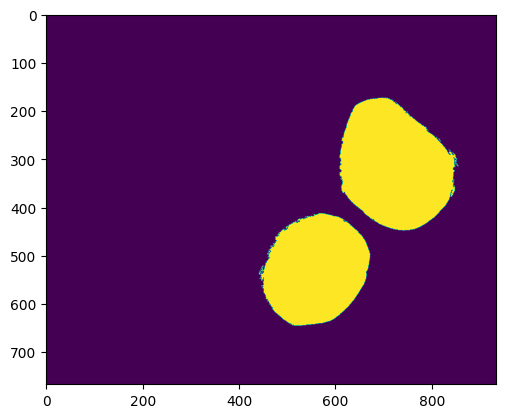

In [67]:
res = wsi_mask ^ neg_mask
plt.imshow(res)

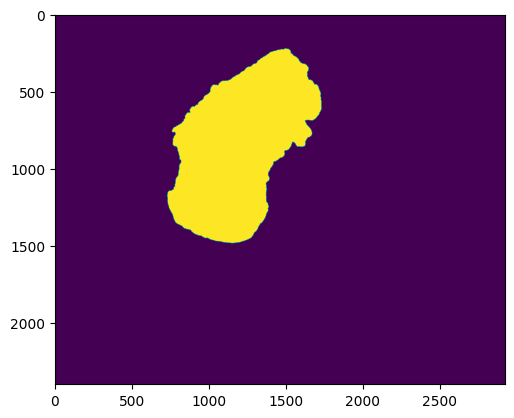

In [31]:
casei = 'a2d0ce4f-9dad-d581-9a20-cc51d43924aa_153530'
mask = skio.imread('/DataMount/xl260/Megan_scanner/Output/mask/'+ casei + '.png')
plt.imshow(mask)


In [33]:
mask.shape

(2400, 2921)

In [38]:
mask = mask>0

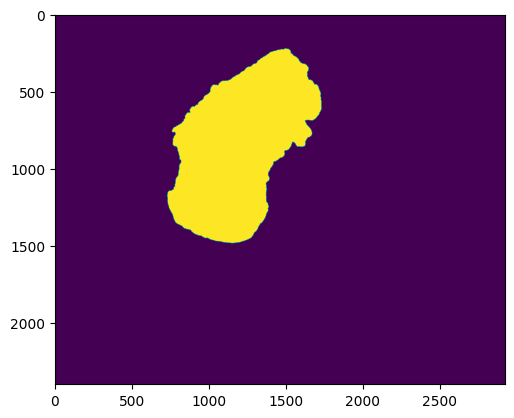

In [39]:
plt.imshow(mask)

In [62]:
# upsize msk to mask size
from skimage.transform import resize
msk_up = resize(msk, (mask.shape[0], mask.shape[1]))


In [63]:
new_mask = msk_up ^ mask